# Unsupervised learning

## Кластеризация

Задача кластеризации - разбить пространство объёктов на группы таким образом, чтобы одинаковые объекты были в одной группе, а разные объекты в разных группах

In [38]:
import os
import shutil 

import numpy as np
from google.colab import drive

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

ROOT_DIR = '/content/drive' 
drive.mount(ROOT_DIR)
print('Подключили диск')

root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', 'ml_course_data')
if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  print('Содержимое директории %s: %s' % (root_data_dir, os.listdir(root_data_dir)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Подключили диск
Содержимое директории /content/drive/MyDrive/ml_course_data: ['nyt-ingredients-snapshot-2015.csv', 'insurance.csv', 'non_linear.csv', 'client_segmentation.csv', 'eigen.pkl', 'clustering.pkl', 'boosting_toy_dataset.csv', 'ocr_dataset.zip', 'final_dataset.zip', 'politic_meme.jpg', 'gray_goose.jpg', 'memes', 'optimal_push_time', 'sklearn_data', 'my_little_recsys', 'corpora', 'nltk_data_old', 'logs', 'nltk_data', 'torch_models', 'recsys_data', 'MNIST', 'CIFAR', 'hymenoptera_data', 'pet_projects', 'ocr_dataset_sample.csv', 'geo_points.csv.gzip']


Как работает кластеризация

num points: 100


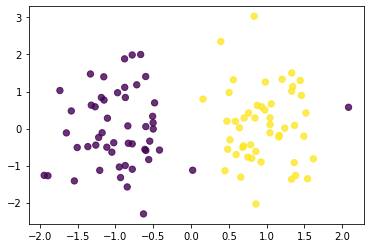

In [45]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file_path = os.path.join(root_data_dir, 'clustering.pkl')

# читаем исходный файл
with open(file_path, 'rb') as f:
    data_clustering = pickle.load(f)
#  распаковываем данные
X = np.array(data_clustering['X'])
print('num points: %d' % X.shape[0])

Y = np.array(data_clustering['Y'])
# визуализация
plt.scatter(
    X[:, 0],
    X[:, 1], 
    s=40, c=Y, marker='o', alpha=0.8, label='data'
)
plt.show()

Видно, что данные разделены на два кластера. Кластера линейно не разделимы - мы видим один "выброс" (аутлаер)

Запускаем алгоритм кластеризации

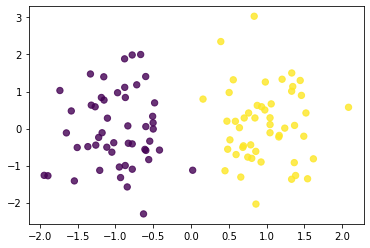

In [49]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X)

predicted_labels = kmeans_model.labels_
# визуализация
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=40, c=predicted_labels, marker='o', alpha=0.8, label='data'
)
plt.show()

In [50]:
# kmeans_model = KMeans(n_clusters=3, random_state=42)
# kmeans_model.fit(X)

# predicted_labels = kmeans_model.labels_
# # визуализация
# plt.scatter(
#     X[:, 0],
#     X[:, 1],
#     s=40, c=predicted_labels, marker='o', alpha=0.8, label='data'
# )
# plt.show()

Видим, что аутлаер не "выявился", ну это скорее хорошо чем плохо

Каждый кластер характеризуется его центром. Центр кластера - среднее арифметическое  координат точек, которые входят в кластер

In [51]:
FIRST_CLUSTER_LABEL = 0
SECOND_CLUSTER_LABEL = 1

# Первый кластер
c_1 = X[
  np.where(predicted_labels==FIRST_CLUSTER_LABEL)
].mean(axis=0)

# Второй кластер
c_2 = X[
  np.where(predicted_labels==SECOND_CLUSTER_LABEL)
].mean(axis=0)

c_1, c_2

(array([-0.97742455, -0.03263543]), array([0.97792098, 0.10168404]))

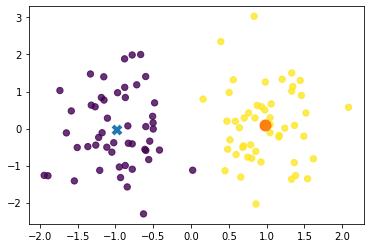

In [52]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=predicted_labels, marker='o', alpha=0.8, label='data')
plt.plot(c_1[0], c_1[1], marker='x', mew=4, ms=8)
plt.plot(c_2[0], c_2[1], marker='o', mew=4, ms=8)
plt.show()

In [33]:
c_1

array([-0.97742455, -0.03263543])

**Задача**

Пусть центр

* Оставьте в датасете `X` только точки, которые соответствуют кластеру `Y==0` (c помощью `np.where`)
* посчитать сумму расстояний от каждой точки полученного датасета до центроида лейбла `c1 = [-0.97742455, -0.03263543]`
* округлите результат

Воспользуемся `from sklearn.metrics.pairwise.euclidean_distances`

Округлите результат `res` с помощью
```
np.round(res, 2)
```

Мы посчитаем т.н. сумму внутрикластерных расстояний - эта величина часто используется в метриках кластеризации

In [34]:
from sklearn.metrics.pairwise import euclidean_distances

#------ ВАШ КОД ТУТ ----------





#-------------------------------

### Вычислительная сложность

Применяют вычисление центроидов по подвыборке, такая модификация получила название **Mini batch K-mean**

### Инициализация центроидов

В зависимости от того, где расположаться центроиды при начальной инициализации зависит то, куда сойдётся алгоритм.

Выход - запустить алгоритм несколько раз. После нескольких запусков есть два варианта:

1. усреднить центроиды
2. Выбрать лучший по метрика качества (см. ниже)

### Выбор количества кластеров $k$

Существенный недостаток алгоритма заключается в необходимости до начала эксперимента выборать количество кластеров. Для подбора вводится метрика качества кластеризации с центроидами $\mu_k \forall k=1,\ldots,K$, которая измеряет внутрикластерное расстояние - насколько хорошо центр, который мы выбрали, совпадает с "идеальным" цетром кластера
$$
J(C) = \sum_{k=1}^{K}\sum_{j \in C_k} \mid x_i - \mu_k \mid \rightarrow min
$$

Очевидно, что эта метрика достигает оптимума в точке, где количество соответствует количеству элекментов в выборке. Однако, это вырожденый случай - на практике применяют эвристику "метод локтя"+ которая предполагает выбор точки, в которой резко снижается динамика изменения $J(C)$:
$$
D(K) =\frac{\mid J(C_{k+1}) - J(C_{k}) \mid}{\mid J(C_{k}) - J(C_{k-1}) \mid} \rightarrow \min
$$

step 0, cluster shift: [0.454444537911925, 1.2553134393847336]
step 1, cluster shift: [0.3730812286618841, 0.35956061205914036]
step 2, cluster shift: [0.18013725916764725, 0.23737525847898183]
step 3, cluster shift: [0.16208252375403975, 0.16472713883564086]
step 4, cluster shift: [0.06707457726376119, 0.07967917794642196]
step 5, cluster shift: [0.030537800022569336, 0.030261708091210857]
step 6, cluster shift: [0.0, 0.0]


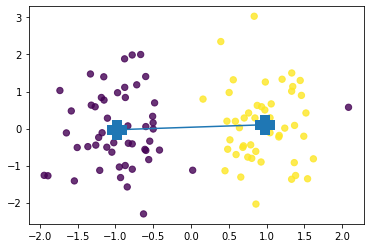

In [58]:
from scipy.spatial import distance

def k_means(X:np.array, k: int=2, eps: float=0.001, num_iteration: int=10, verbose: bool=True) -> np.array:
    """Алгоритм К-средних
    
    :param X: обучающая выборка
    :param k: количество кластеров
    """
    try:
        n, m = X.shape
    except ValueError:
        print("Обучающая выборка должна быть двумерным массивом (n, m) гдк m - размер выборки")
    # инициализируем центроиды случайным элементом выборки
    centroid_objects = [
        X[obj_id, :]
        for obj_id in np.random.randint(0, n, size=k)
    ]
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    # расстояние между предыдущим и текущим положением каждого центроида
    weight_evolution = [
        distance.euclidean(centroid_objects_prev[i], centroid_objects[i]) 
        for i in range(k)
    ]
    # условие остановки: центроиды не изменили своего положения
    step = 0
    # повторяем до выполнения условия остановки
    while sum(weight_evolution[i] > eps for i in range(k))!=0 and step < num_iteration:
        # иначе можно прострелить себе ногу =0
        centroid_objects_prev = centroid_objects.copy()
        # формируем матрицу (n x k), которая содержит расстояние от каждого объекта до каждого центроида
        # этот код можно переписать с использованием scipy.spatial.distance.cdist
        cluster_distance = np.hstack([
            np.sqrt(
                np.power(X - centroid, 2).sum(axis=1)
            ).reshape(-1,1)
            for centroid in centroid_objects
        ])
        # находим минимальное расстояние в каждой строчке - это будет кластер объекта
        cluster_lables = cluster_distance.argmin(axis=1)
        # усредняем координаты объектов каждого кластера - это новое положение центроида
        centroid_objects = [
            X[cluster_lables==i].mean(axis=0) for i in range(k)
        ]
        # вычисляем расстояние между центроидами на соседних итерациях
        weight_evolution = [
            distance.euclidean(centroid_objects_prev[j], centroid_objects[j]) 
            for j in range(k)
        ]
        if verbose:
            print("step %s, cluster shift: %s" % (step, weight_evolution))
        # обновлённые кластера
        step += 1
    return np.vstack(centroid_objects), cluster_lables
    

centroids, labels = k_means(X, k=2, num_iteration=10)

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.plot(centroids[:, 0], centroids[:, 1], marker='+', mew=10, ms=20)
plt.show()

cluster_num 2, metric 104.88968562582932
cluster_num 3, metric 78.68276105918173
cluster_num 4, metric 54.52754398590666
cluster_num 5, metric 49.823902649735814
cluster_num 6, metric 45.6519553290917
cluster_num 7, metric 42.03113511055736
best cluster num: 2


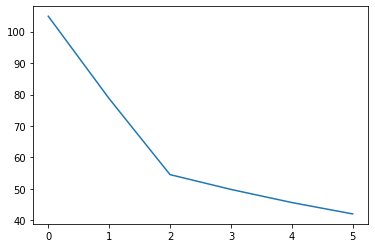

In [59]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def J(centroid: np.array, sample: np.array) -> float:
    """Вычисляем качество кластера
    
    """
    return np.sqrt(
        np.power(
            sample - centroid, 2
        ).sum(axis=1)
    ).sum()

X_3, Y_3 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)

metrics = []
MAX_CLUSTERS = 8
for cluster_num in range(2, MAX_CLUSTERS):
    try:
        centroids, labels = k_means(X_3, k=cluster_num, num_iteration=10, verbose=False)
        metric = sum(
            J(centroids[centroid_label], X_3[labels==centroid_label])
            for centroid_label in range(cluster_num)
        )
        print("cluster_num %s, metric %s" % (cluster_num, metric))
        metrics.append(metric)
    except ValueError:
        print("Ошибка кластеризации cluster_num=%s" % cluster_num)


D = [abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
     for i in range(1, len(metrics)-1)]
print("best cluster num: %s" % (np.argmin(D)+1))

#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.plot(metrics)
plt.show()

# Гео данные

Данные по вызовас такси в городе [Johor Bahru](https://www.google.com/maps/place/Джохор-Бару,+Джохор,+Малайзия/@1.5448504,103.5695405,11z/data=!3m1!4b1!4m5!3m4!1s0x31da12c6d36b3a27:0xd5f4b21db593d4f5!8m2!3d1.492659!4d103.7413591)

In [60]:
geo_data_path = os.path.join(root_data_dir, 'geo_points.csv.gzip')

geo_points_df = pd.read_csv(geo_data_path, compression='gzip')
print('num_rows: %d' % geo_points_df.shape[0])

num_rows: 20000


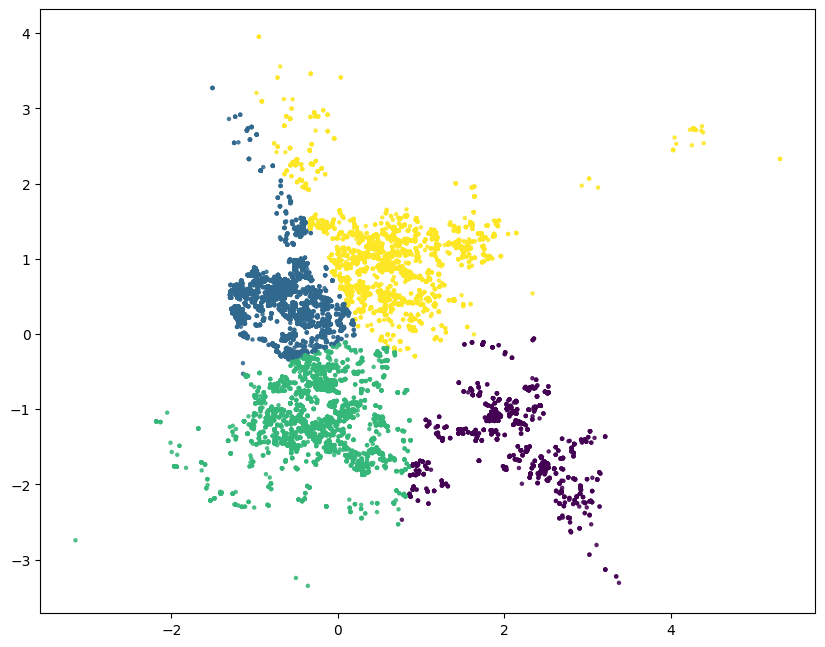

In [69]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=100)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def plot_data(X, labels):
  plt.scatter(
      X[:, 0],
      X[:, 1],
      s=5, c=predicted_labels, marker='o', alpha=0.8, label='data'
  )
  plt.show()

X = geo_points_df[['fromlatitude', 'fromlongitude']].values
X = StandardScaler().fit_transform(X)

kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(X)

predicted_labels = kmeans_model.labels_

plot_data(X, predicted_labels)

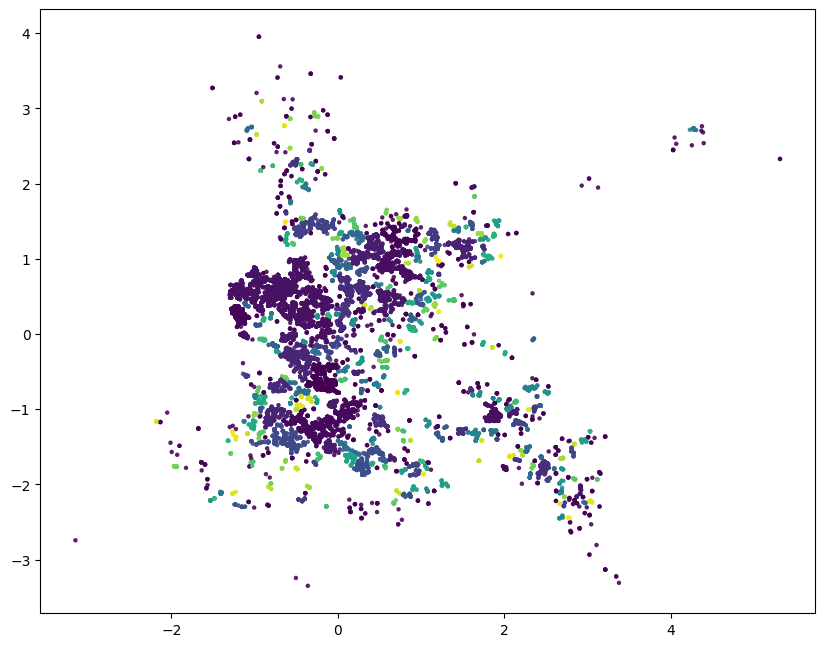

In [67]:
from sklearn.cluster import DBSCAN

figure(figsize=(10, 8), dpi=100)

X = geo_points_df[['fromlatitude', 'fromlongitude']].values
X = StandardScaler().fit_transform(X)
clustering = DBSCAN(
    eps=0.05, min_samples=6
).fit(X)
predicted_labels = clustering.labels_

plot_data(X, predicted_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


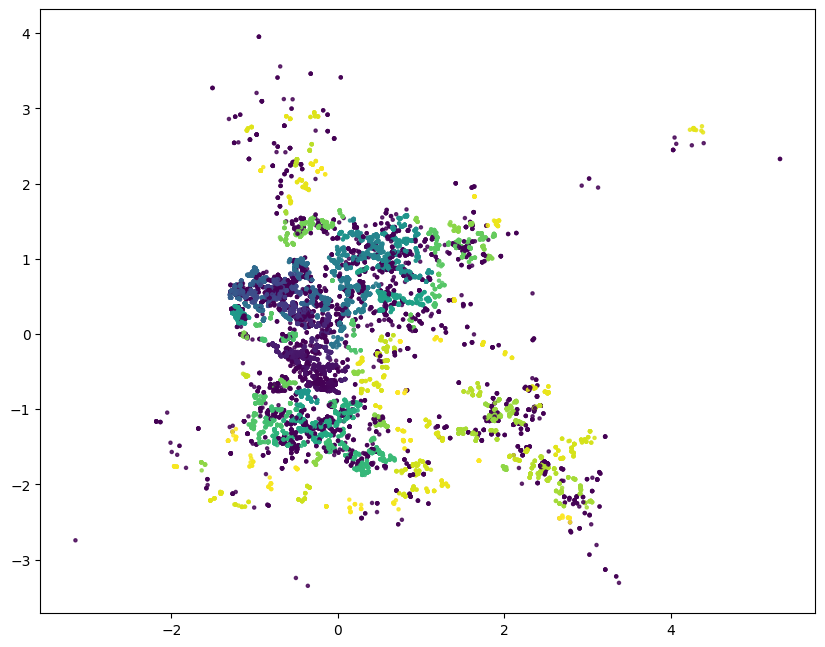

In [71]:
from sklearn.cluster import OPTICS

figure(figsize=(10, 8), dpi=100)

X = geo_points_df[['fromlatitude', 'fromlongitude']].values
X = StandardScaler().fit_transform(X)
clustering = OPTICS(max_eps=0.1, min_samples=10).fit(X)
predicted_labels = clustering.labels_

plot_data(X, predicted_labels)

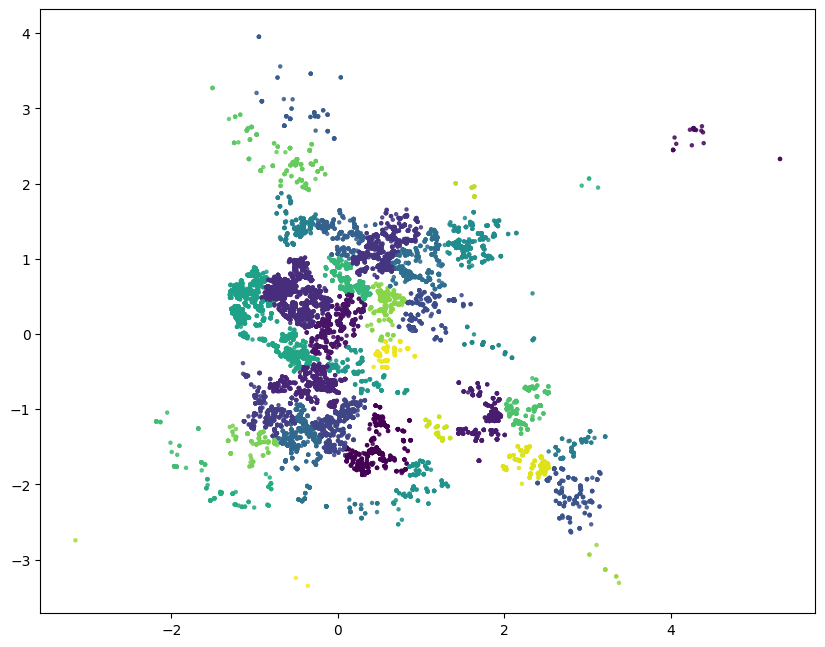

In [72]:
from sklearn.cluster import Birch

figure(figsize=(10, 8), dpi=100)

X = geo_points_df[['fromlatitude', 'fromlongitude']].values
X = StandardScaler().fit_transform(X)
clustering = Birch(threshold=0.05, branching_factor=10, n_clusters=40).fit(X)

predicted_labels = clustering.labels_

plot_data(X, predicted_labels)

## Снижение размерности

### Алгоритм PCA

Загрузим модельные данные

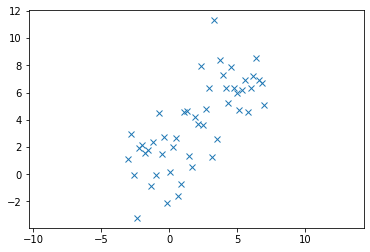

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

file_path = os.path.join(root_data_dir, 'eigen.pkl')

with open(file_path, 'rb') as f:
    X = pickle.load(f)

plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

Применяем алгоритм `sklearn.decomposition.PCA` к набору данных:

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

Мы сжали с помощью PCA двумерные данные в одномерный массив. 

![pca_arrays](img/pca_arrays.png)

Давайте визуализируем этот массив - для этого надо произвести обратное преобразование из одномерного массива в двумерный. Отобразим "восстановленные" данные на графике (вторая картинка - исходный, не сжатый массив):

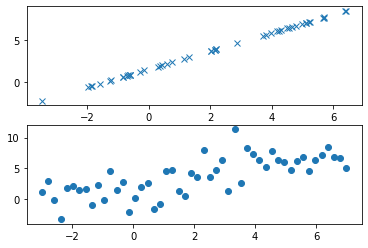

In [76]:
X_new = pca.inverse_transform(X_pca)

plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:,0], X_new[:,1], 'x')

plt.subplot(212)
plt.plot(X[:,0], X[:,1], 'o')
plt.show()

Функция `inverse_transform` перереводит из одномерного пространства обратно в двумерное

Видно, что мы потеряли часть информации (меньше дисперсия - меньше информации в данных)

Алгоритм PCA выявил, что переменная от $x_2$ линейным образом зависит от переменной $x_1$ - то есть вместо перемнной $x_2$ можно использовать линейное преобразование $x_2 = x_1w_1 + w_0$ (эта переменная на первом графике). "Сжатые данные" представляют собой график линейной функции $x_2 = ax_1 + b$. 

Данные, представляли собой облако точек, но алгорим PCA ужал их до одномерного случая. Другие интересные визуализации можно [глянуть по ссылке](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

### Применение к реальным задачам

Снижение размерности применяем, чтобы "облегчить жизнь" алгоритмам машинного обучения. Иногда на данных большой размерности сложно хороший результат получить, а после снижения размерности качество модели улучшается

Применим PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff'

Этот датасет уже разбирали на лекции по классификации

In [78]:
df_source

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0
...,...,...,...,...
95,1.506425,-0.483638,2.096115,1.0
96,-1.948987,-2.192459,0.943793,2.0
97,-1.384253,1.522339,2.854824,0.0
98,1.957208,0.429976,2.750221,1.0


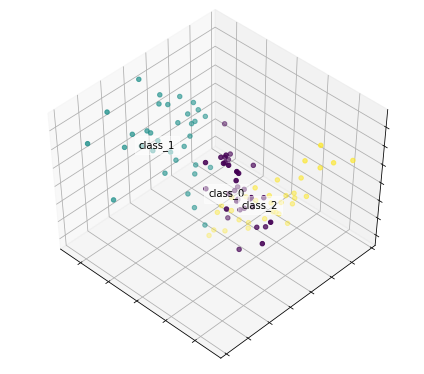

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

file_path = os.path.join(root_data_dir, 'client_segmentation.csv')

df_source = pd.read_csv(file_path)

X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

Сжимаем данные и визуализируем

In [79]:
X.shape

(100, 3)

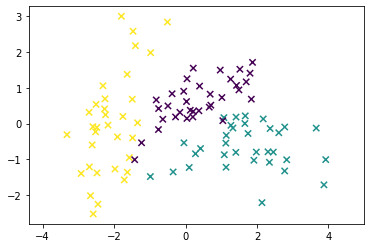

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], s=40, c=y, marker='x')
plt.axis('equal')
plt.show()

In [81]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=input_y, random_state=RANDOM_SEED
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)


Вычисляем скор по исходным данным

In [82]:
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

eval_model(X, y)

Accuracy: 0.80000


Применяем преобразование и снова решаем задачку классификации

In [83]:
eval_model(X_pca, y)

Accuracy: 0.83333


**Вывод**: удалось улучшить качество на "слабой" модели решающего дерева за счёт снижения размерности входных данных 

### Алгоритм umap

Ниболее мощный алгоритм для снижения размерности

In [85]:
from IPython.display import clear_output
!pip install umap-learn

clear_output()

In [87]:
from umap import UMAP

In [88]:
manifold = UMAP(
    random_state=RANDOM_SEED, n_components=2
).fit(X, y)
X_umap = manifold.transform(X)

Визуализируем данные

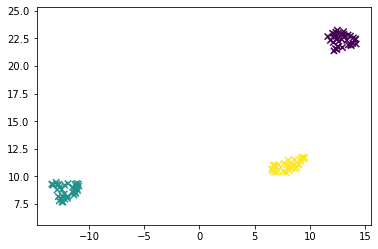

In [89]:
plt.scatter(X_umap[:,0], X_umap[:,1], s=40, c=y, marker='x')
plt.axis('equal')
plt.show()

In [90]:
eval_model(X_umap, y)

Accuracy: 1.00000


Данные стали линейно разделимы, качество потрясающее даже на слабом алгоритме. Подробнее можно почитать в [статье](https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17)

### Снижаем размерность изображений

До сих пор мы работали с табличными данными, для разнообразия можно немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

```shell
pip install Pillow
```

In [91]:
pip install Pillow
clear_output()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


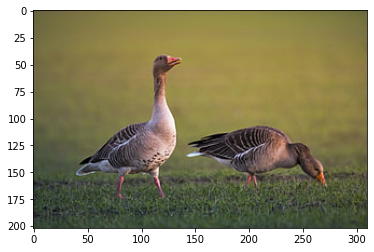

In [94]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg

file_path = os.path.join(root_data_dir, 'gray_goose.jpg')
img = mpimg.imread(file_path)

imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) однотонную с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

Однотонная картинка - это по сути матрица, где на пересечении строки и столбца находится яркость пикселя

<class 'numpy.ndarray'> (202, 310)


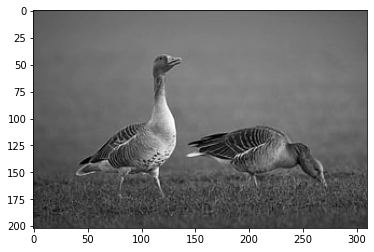

In [95]:
def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)

# демонстрируем, что у нас матрица размерности 202 x 310
print(type(img_gray), img_gray.shape)

imshow(img_gray, cmap = "gray")
plt.show()

In [96]:
img_gray.shape

(202, 310)

Далее 

* обучите на массиве *img_gray* размерности $202 \times 310$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должен получиться гусь как бы в очень нечётком виде


In [97]:
from sklearn.decomposition import TruncatedSVD